# BIG DATA ANALYTICS COURSE

## Quiz 3 Data Wrangling Mathematics

In this Quiz you will apply what you have learned in the guided exercises to a new dataset. This dataset  is derived from a dataset used for a data mining competition hosted by DARPA. It is referred to as the KDD-99 intrusion detection dataset. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between “bad" connections, called intrusions or attacks, and “good” normal connections.

Details on the dataset can be accessed here: http://kdd.ics.uci.edu/databases/kddcup99/task.html.

Course of Action: Using the techniques developed in the guided exercises, ingest the dataset, “wrangle the data,” and use your knowledge of Numpy and Python to answer the Quiz questions.

In [1]:
import numpy as np
import pandas as pd

# Read in the dataset
df = pd.read_csv('challenge_quiz_2.csv')
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


### 1. How many observations are contained in the dataset?
there are 494020 observations

In [3]:
df.shape

(494020, 42)

### 2. How many attributes are contained in the dataset?
Atributes are the number of columns of the dataset

In [10]:
df.columns.size

42

### 3. What is the average length of a connection (in seconds)?

In [13]:
np.max(df.duration)

58329

In [15]:
np.mean(df.duration)

47.97939961944861

### 4. How many different types of protocols are contained in the dataset?

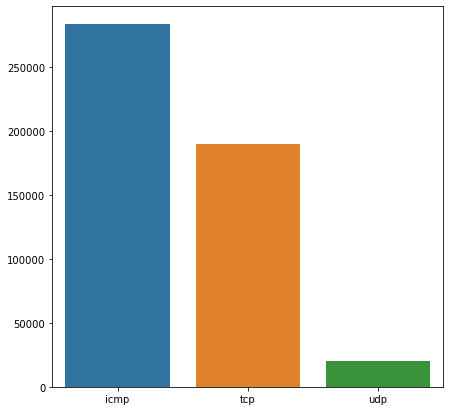

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
table =df.protocol_type.value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x= table.index, y=table.values)

In [24]:
table.values

array([283602, 190064,  20354], dtype=int64)

### 5. What is the maximum number of failed login attempts recorded in this dataset?
we look first at column names to figure out where this data maya be stored. There is a column: ***'num_failed_logins'***

In [19]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In order to look for the max number of fail attempts we use the ***max()*** funtion of dataframe. there was only ***one*** attempt with 5 log-in failures

In [20]:
df.num_failed_logins.max()

5

In [21]:
df.num_failed_logins.value_counts()

0    493957
1        57
2         3
5         1
4         1
3         1
Name: num_failed_logins, dtype: int64

### 6. What was the duration (in seconds) of the connection when the maximum number of failed login attempts was recorded in the dataset?

Since there was just only one attempt, we can look it up directly. It is observation num. 15699 and had a duration of 23

In [22]:
df.duration[df.num_failed_logins == 5]

15699    23
Name: duration, dtype: int64

In [28]:
df[15699:15700].num_failed_logins

15699    5
Name: num_failed_logins, dtype: int64

### 7. Missing values are represented in the dataset by the integer -99999. In our case, there is one corrupted entry present. Replace this missing value with the average value of the column where it is present. What is the new average value for this column?

We can use an already existing complex function to look up a single value across all elements of the dataframe. It yields the row or rows that contain the look-up value (-99999)

In [12]:
mask = np.column_stack([df[col].astype(str).str.contains("-99999", na=False) for col in df])
df.loc[mask.any(axis=1)]



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
73,0,tcp,http,SF,164,-99999,0,0,0,0,...,255,1.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,normal


the missing value sits in the **'dst_bytes'** attribute. The mean of the column with -99999 in it is:

In [67]:
df.dst_bytes.mean()

868.3193271527468

We create a new df with the dst_bytes column and replace -99999 with  **numpy.NaN**, which is ignored by mathematical functions such as mean()

In [70]:
dfDst_bytes = df.dst_bytes.copy()
dfDst_bytes[73] = np.nan
print(dfDst_bytes[73])

nan


The new mean:

In [71]:
dfDst_bytes.mean()

868.5235041567228

Now we relace the NaN value with the new mean 868.52350

In [72]:
dfDst_bytes[73] = dfDst_bytes.mean()
print(dfDst_bytes[73])

868.5235041567228


and we calculate the new mean()

In [73]:
dfDst_bytes.mean()

868.5235041567227

In [16]:
np.sum(df['dst_bytes'] == '-99999')

0

In [20]:
np.sum(df['dst_bytes']==-99999)

1

In [38]:
for c in df.columns:
    #df.loc[df[c] == -99999].index.values devuelve un array
    if df.loc[df[c] == -99999].index.values.size>0:
        print(df.loc[df[c] == -99999].index.values)

[73]


### 8. Write a function that converts seconds to milliseconds. Apply this function to all the elements in the 'duration' column and then find the average time of a connection in milliseconds.

In [76]:
def converToMil (x):
    return x * 1000

df.duration.apply(converToMil).mean()

47979.3996194486

### 9. Extract all the observations where Internet Relay Chat was employed. How many observations were obtained? Save these observations to a new DataFrame.

In [77]:
df.service.unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

the following approach yields a boolean dataframe with **Trues** where 'IRC' is found, and **Falses** elsewhere. The sum across all df yields the number of observations 

In [93]:
df_IRC = df['service']== 'IRC'
df_IRC.sum()

43

In [81]:
df_IRC2 =df[df["service"]== 'IRC']
df_IRC2.shape

(43, 42)

### 10. Group these new observations by the 'label' attribute. How many observations reveal evidence of an intrusion?

In [82]:
df_IRC2.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
491412,10469,tcp,IRC,RSTR,2182,9386.0,0,0,0,0,...,4,0.57,0.29,0.14,0.0,0.00,0.00,0.57,1.00,normal
148572,9170,tcp,IRC,RSTO,1508,5434.0,0,0,0,0,...,2,0.02,0.02,0.01,0.0,0.00,0.00,0.02,1.00,normal
74499,238,tcp,IRC,RSTO,132,1247.0,0,0,0,0,...,22,0.13,0.01,0.01,0.0,0.01,0.05,0.10,0.73,normal
371718,0,tcp,IRC,S1,1808,6788.0,0,0,0,0,...,1,1.00,0.00,1.00,0.0,1.00,1.00,0.00,0.00,normal
371720,8800,tcp,IRC,RSTR,1127,8103.0,0,0,0,0,...,8,0.38,0.10,0.05,0.0,0.10,0.25,0.19,0.50,normal


In [84]:
df_IRC2.label.unique()

array(['normal', 'satan'], dtype=object)

In [87]:
df_IRC2.label.value_counts()

normal    42
satan      1
Name: label, dtype: int64